<a href="https://colab.research.google.com/github/mayconmota/DIO-Analise-de-dados-com-Python-e-Pandas/blob/main/Aula_5_Trabalhando_com_Datas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalhando com Datas**

In [ ]:
#Importando a biblioteca pandas
import pandas as pd

In [ ]:
#Leitura dos arquivos, e atribuição às variáveis de armazenamento
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
#Juntando todos os arquivos e atribuindo à uma variável
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
#Exibindo as 5 primeiras linhas do novo dataframe
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [ ]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID       int64
Qtde         int64
Receita    float64
dtype: object

In [ ]:
#Transformando os dados coluna de data em tipo data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
#Retornando 5 amostras aleatórias do dataframe
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
40,Aracaju,2018-01-01,6.99,1522,7,48.93,2018
131,Recife,2019-03-02,139.07,982,6,834.42,2019
230,Natal,2019-01-03,184.69,1036,1,184.69,2019
89,Salvador,2019-01-01,17.46,1034,1,17.46,2019
101,Salvador,2019-01-01,32.28,1035,3,96.84,2019


In [ ]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
#Retornando 5 amostras aleatórias do dataframe
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
67,Aracaju,2018-01-01,78.13,1521,4,312.52,2018
106,Recife,2019-01-01,30.46,982,3,91.38,2019
71,Recife,2019-01-01,138.69,983,3,416.07,2019
141,Salvador,2019-03-02,9.08,1036,1,9.08,2019
38,Recife,2019-01-01,104.53,983,4,418.12,2019


In [ ]:
#Extraindo o mês e dia
df["mes_venda"], df["dia_venda"] = df["Data"].dt.month, df["Data"].dt.day

In [ ]:
#Retornando 5 amostras aleatórias do dataframe
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
77,Aracaju,2018-01-01,24.10,1522,1,24.10,2018,1,1
96,Fortaleza,2019-01-01,23.31,1004,4,93.24,2019,1,1
171,Natal,2019-01-02,136.45,1035,3,409.35,2019,1,2
23,Aracaju,2018-01-01,237.50,1523,7,1662.50,2018,1,1
129,Natal,2019-01-02,125.66,1037,1,125.66,2019,1,2


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferença de dias
df["difenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
#Retornando 5 amostras aleatórias do dataframe
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,difenca_dias
114,Fortaleza,2019-03-02,16.82,983,4,67.28,2019,3,2,425 days
184,Salvador,2019-01-02,167.16,1037,1,167.16,2019,1,2,366 days
180,Natal,2019-01-02,116.63,1035,2,233.26,2019,1,2,366 days
6,Salvador,2019-01-01,36.30,1034,2,72.60,2019,1,1,365 days
29,Recife,2019-01-01,10.18,980,8,81.44,2019,1,1,365 days


In [ ]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
#Retornando 5 amostras aleatórias do dataframe
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,difenca_dias,trimestre_venda
186,Salvador,2019-01-02,169.09,1036,2,338.18,2019,1,2,366 days,1
116,Aracaju,2018-01-01,48.44,1522,4,193.76,2018,1,1,0 days,1
155,Salvador,2019-01-02,237.81,1036,3,713.43,2019,1,2,366 days,1
73,Fortaleza,2019-01-01,3.10,1003,5,15.50,2019,1,1,365 days,1
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2019,3,2,425 days,1


In [ ]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
#Retornando a coluna de vendas em março de 2019
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,difenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [ ]:
#Retornando 20 amostras aleatórias do dataframe
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,difenca_dias,trimestre_venda
129,Salvador,2019-03-02,125.66,1037,1,125.66,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
128,Fortaleza,2019-03-02,38.70,982,4,154.80,2019,3,2,425 days,1
122,Salvador,2019-03-02,13.27,1037,1,13.27,2019,3,2,425 days,1
116,Recife,2019-03-02,79.10,982,2,158.20,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
29,Natal,2019-03-09,646.00,854,2,1292.00,2019,3,9,432 days,1
117,Salvador,2019-03-02,39.41,1034,1,39.41,2019,3,2,425 days,1
133,Recife,2019-03-02,14.67,980,7,102.69,2019,3,2,425 days,1
125,Recife,2019-03-02,37.60,983,4,150.40,2019,3,2,425 days,1


**Aula_6_Visualização_de_dados**

In [ ]:
#Verificando quantas linhas constam com cada Id de loja
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

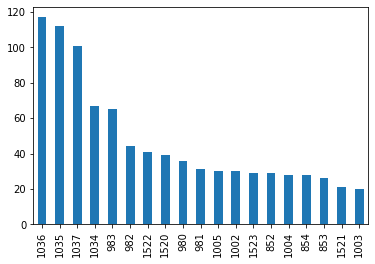

In [ ]:
#Verificando quantas linhas constam com cada Id de loja e plotando num gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

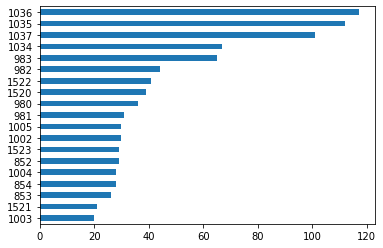

In [ ]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

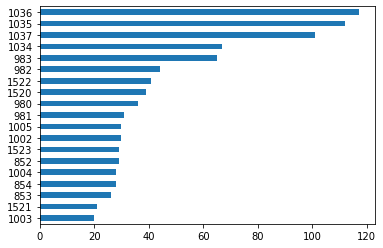

In [ ]:
#Gráfico de barras horizontais, sem a linha na parte superior
df["LojaID"].value_counts(ascending=True).plot.barh();

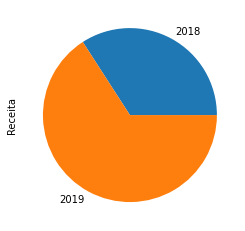

In [ ]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de Vendas')

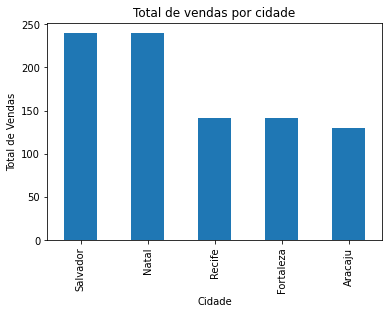

In [ ]:
#Adicionando um título e alterando o nome dos ativos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

Text(0, 0.5, 'Total de Vendas')

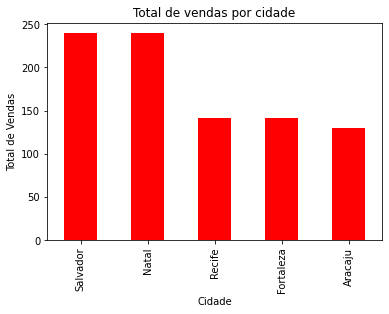

In [ ]:
#Adicionando um título e alterando o nome dos ativos, e adicionando cor as barras
#Documentação do Matplotlib: https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

In [ ]:
#Alterando o estilo
#Documentação do matplotlib: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("ggplot")

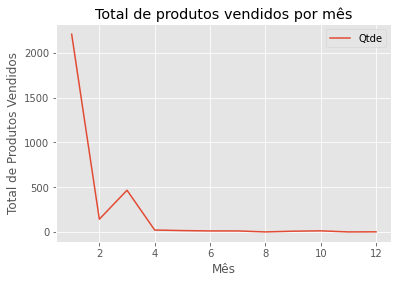

In [ ]:
#Criando um novo gráfico
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos");
plt.legend()

In [ ]:
#Retorna a quantidade de produtos vendidos por mês
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

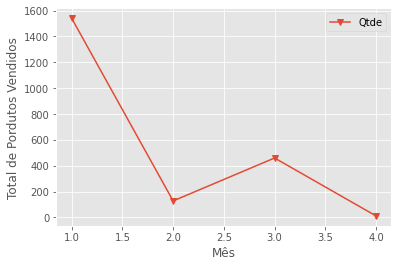

In [ ]:
#Total de produtos vendidos por mês, em 2019, utilizando o arcador "v"
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de Pordutos Vendidos")
plt.legend();

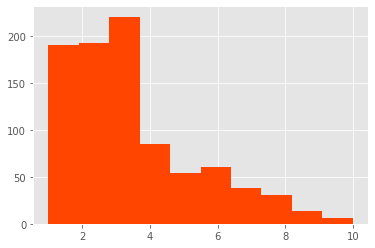

In [ ]:
#Plotando um gráfico de histograma
#Documentação das cores: https://matplotlib.org/exemples/color/named_colors.html
plt.hist(df["Qtde"], color="orangered");

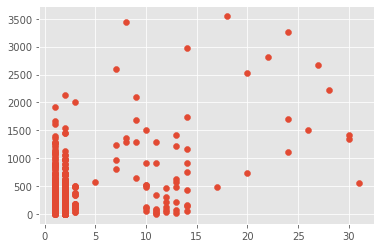

In [ ]:
#Plotando o gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

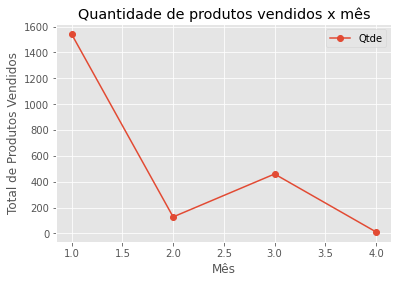

In [ ]:
#Salvando o gráfico em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")